In [2]:
import torch
from dataset import QuickdrawDataset
import torch.utils.data
import torchvision.transforms as transforms
from dataset_loader import download_data, combine_data
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import h5py
import numpy as np

In [3]:
download_data(["cat", "nose", "drill", "duck", "teddy-bear", "potato", "foot", "fish", "banana", "snail"])
combine_data(10000)

100%|██████████| 10/10 [01:20<00:00,  8.06s/it]


In [5]:
target = torch.tensor(np.load("data/y.npy")).long()
print(target[0])
y = target[0]
y = torch.nn.functional.one_hot(y, 10) 
print(y)

tensor(9)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])


In [6]:
dataset = QuickdrawDataset(datapath="data/X.npy",
                      targetpath="data/y.npy",
                           transform=transforms.Compose([
                               transforms.Resize((28,28)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.15,), (0.3038,))
                           ]))

In [7]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=True, num_workers=2)
device = torch.device("cpu")

In [15]:
mean = 0.
std = 0.
for images, _ in dataloader:
    batch_samples = images.size(0)
    images = images.view(batch_samples, images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
mean /= len(dataloader.dataset)
std /= len(dataloader.dataset)
print(mean)
print(std)

tensor([0.1500])
tensor([0.3038])


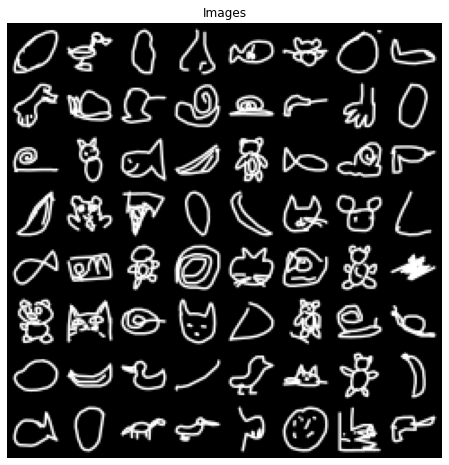

In [8]:
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(), (1,2,0)), cmap='gray', vmin=0, vmax=255)

In [14]:
torch.nn.functional.one_hot(torch.Tensor([[3]*64]).long(), 10) 

RuntimeError: Class values must be smaller than num_classes.